Initial shape: (1596, 12)


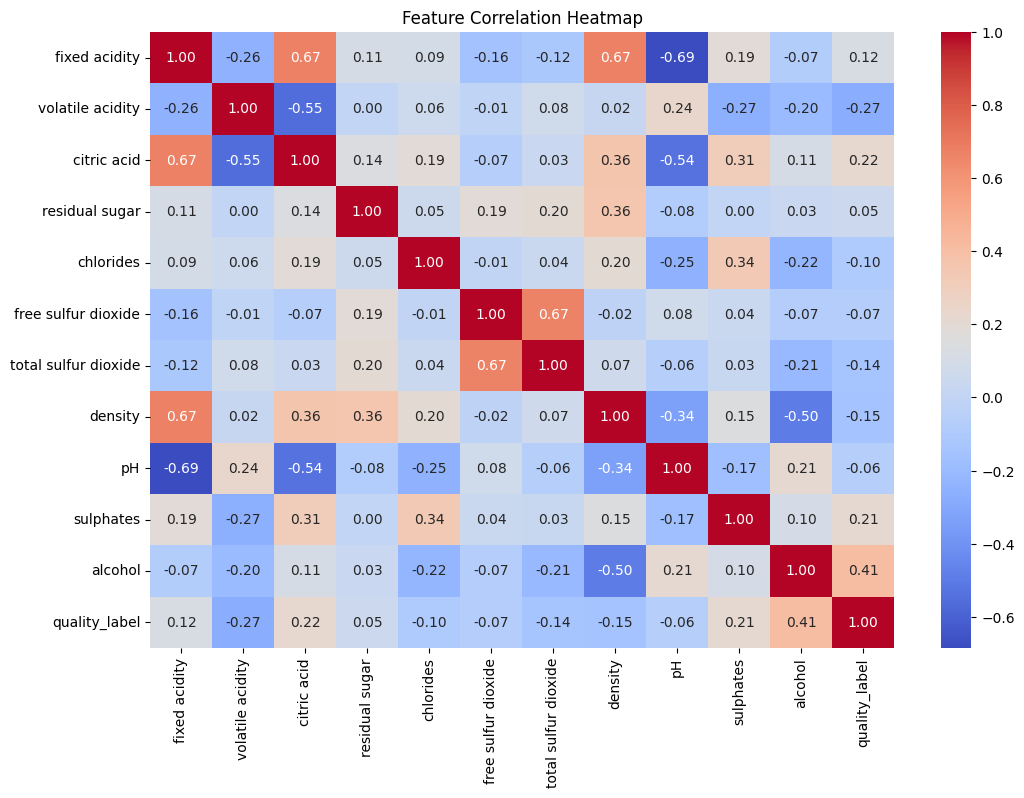

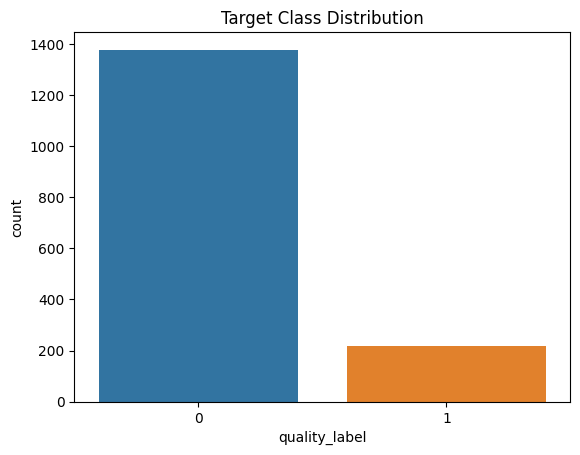

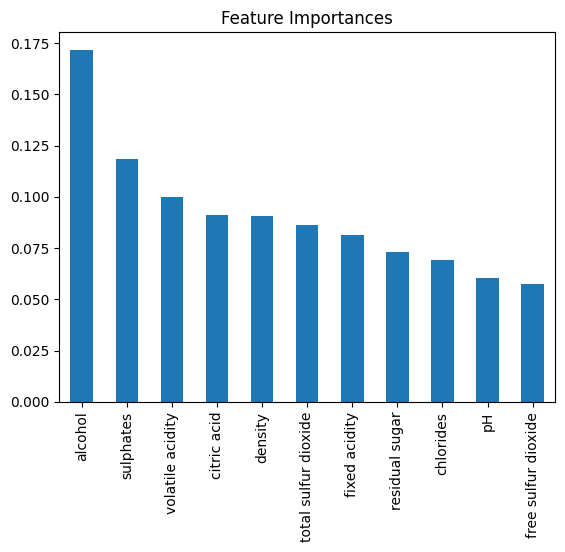


📌 Logistic Regression Evaluation:
              precision    recall  f1-score   support

           0       0.91      0.99      0.94       276
           1       0.80      0.36      0.50        44

    accuracy                           0.90       320
   macro avg       0.85      0.67      0.72       320
weighted avg       0.89      0.90      0.88       320


📌 Random Forest Evaluation:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       276
           1       0.91      0.66      0.76        44

    accuracy                           0.94       320
   macro avg       0.93      0.82      0.87       320
weighted avg       0.94      0.94      0.94       320


📌 SVM Evaluation:
              precision    recall  f1-score   support

           0       0.91      0.99      0.95       276
           1       0.81      0.39      0.52        44

    accuracy                           0.90       320
   macro avg       0.86      0.69      0.73  

In [8]:
# Wine Quality Binary Classification Pipeline – Complete

# 📦 Imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

from sklearn.metrics import classification_report, confusion_matrix

# 📥 Load dataset
df = pd.read_csv("/kaggle/input/winequalityred/winequality-red.csv", sep=",")
print("Initial shape:", df.shape)

# 🎯 Target: Convert quality to binary
df['quality_label'] = df['quality'].apply(lambda q: 1 if q >= 7 else 0)
df.drop('quality', axis=1, inplace=True)

# ✅ No categorical features, skip encoding

# 📊 EDA: Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()

# 📊 EDA: Target balance
sns.countplot(x='quality_label', data=df)
plt.title("Target Class Distribution")
plt.show()

# 🎯 Feature matrix and target
X = df.drop('quality_label', axis=1)
y = df['quality_label']

# 🧪 Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# 🔁 Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 📉 Feature importance using Random Forest (for feature selection)
rf_fs = RandomForestClassifier(random_state=42)
rf_fs.fit(X_train_scaled, y_train)

feat_importances = pd.Series(rf_fs.feature_importances_, index=X.columns)
feat_importances.sort_values(ascending=False).plot(kind='bar', title='Feature Importances')
plt.show()

# (Optional): Drop low-importance features manually if needed

# 🤖 Models
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVM": SVC(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

# 🧪 Train and evaluate models
results = {}

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    report = classification_report(y_test, y_pred, output_dict=True)
    results[name] = {
        "Accuracy": report["accuracy"],
        "Precision": report["1"]["precision"],
        "Recall": report["1"]["recall"],
        "F1-score": report["1"]["f1-score"]
    }
    print(f"\n📌 {name} Evaluation:")
    print(classification_report(y_test, y_pred))

# 📈 Comparison
result_df = pd.DataFrame(results).T
print("\n📊 Model Comparison:")
print(result_df.sort_values("F1-score", ascending=False))

# ✅ Best model: Choose based on F1-score
best_model = result_df.sort_values("F1-score", ascending=False).index[0]
print(f"\n✅ Best Model Based on F1-score: {best_model}")

# 🧪 Bonus: GridSearchCV for Random Forest
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}

grid = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=3, scoring='f1')
grid.fit(X_train_scaled, y_train)
print("\n🔍 Best Random Forest Params from GridSearch:")
print(grid.best_params_)
print("Best F1-score from GridSearch:", grid.best_score_)
